 # 🎬 Movie Rating Prediction Project

## 🎯 Objective
The objective of this project is to predict movie ratings using machine learning models. The dataset includes various details about movies, such as genre, director, and actors, and the goal is to predict the rating of each movie.

## 📂 Data Sources
- **Movie_dataset.csv**: The dataset with detailed information about movies.

## 🛠️ Project Workflow

### 📥 Data Loading
Load the dataset into a Pandas DataFrame for processing.



In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\GL\Movie_dataset.csv", encoding='latin1')


df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# 🧹 Data Cleaning

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [31]:
# Preprocess 'Year' column to extract numeric values
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)




In [32]:
# Preprocess 'Duration' column to extract numeric values
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

In [33]:
# Preprocess 'Votes' column to extract numerical values and convert to float
df['Votes'] = df['Votes'].str.extract('(\d+)').astype(float)

In [34]:
# Impute missing values for numerical columns with the median
numerical_cols = ['Year', 'Duration', 'Rating', 'Votes']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns with the mode
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no missing values left
missing_values_imputed = df.isnull().sum()
print(missing_values_imputed)


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [35]:
# Display information about the dataset after handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  15509 non-null  float64
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  float64
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [36]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,6.0,25.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,25.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.0,25.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# 🔍 Exploratory Data Analysis (EDA)

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select numerical variables for outlier detection
numerical_cols = ['Year', 'Duration', 'Rating', 'Votes']

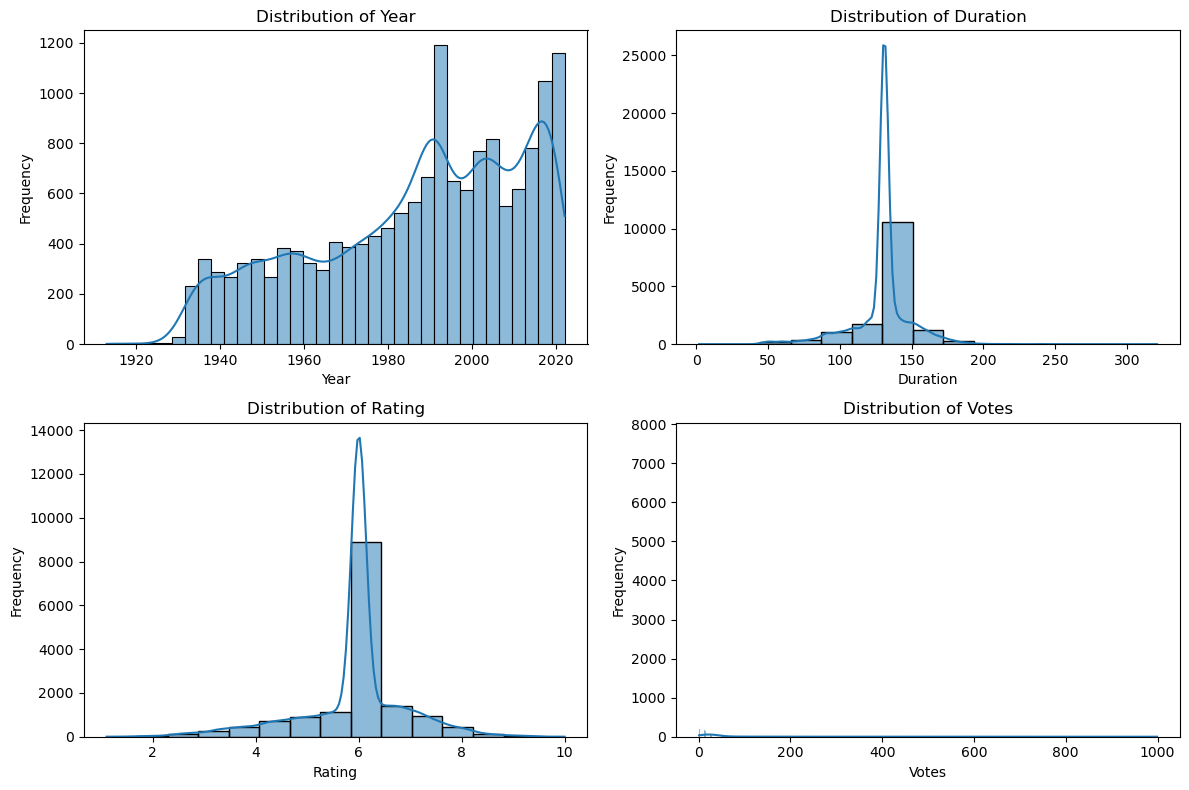

In [38]:
# Visualize distributions using histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

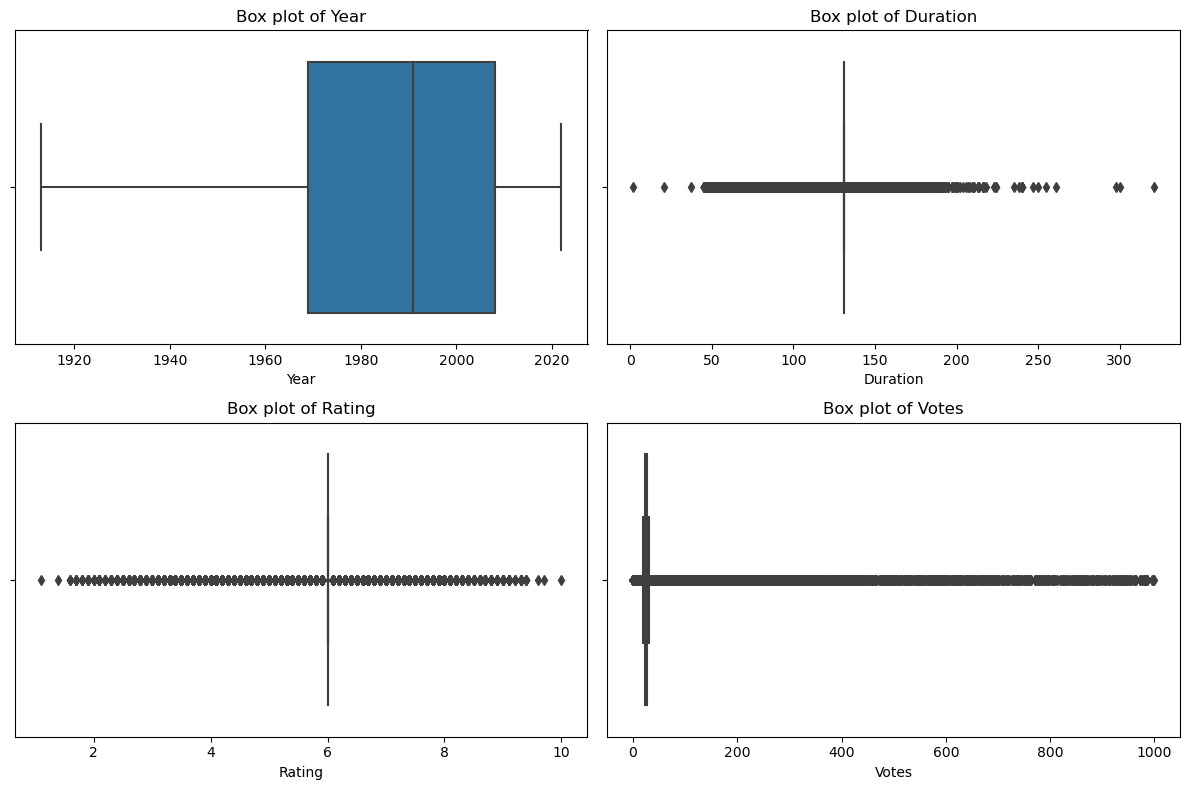

In [39]:
# Create box plots to identify outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [40]:
# Calculate summary statistics
summary_stats = df[numerical_cols].describe()
summary_stats

,Year,Duration,Rating,Votes
count,15509.000000,15509.000000,15509.000000,15509.000000
mean,1987.147979,129.658585,5.919131,64.149720
std,24.990727,19.805742,0.990512,135.458879
min,1913.000000,2.000000,1.100000,1.000000
25%,1969.000000,131.000000,6.000000,24.000000
50%,1991.000000,131.000000,6.000000,25.000000
75%,2008.000000,131.000000,6.000000,27.000000
max,2022.000000,321.000000,10.000000,999.000000


In [41]:
# Define thresholds for outliers using IQR
Q1 = summary_stats.loc['25%', :]
Q3 = summary_stats.loc['75%', :]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on thresholds
outliers = {}
for col in numerical_cols:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

# Print outliers
for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_df)
    print()

Outliers in Year:
Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []

Outliers in Duration:
                                     Name    Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
2                             #Homecoming  2021.0      90.0   
3                                 #Yaaram  2019.0     110.0   
4                       ...And Once Again  2010.0     105.0   
5                    ...Aur Pyaar Ho Gaya  1997.0     147.0   
...                                   ...     ...       ...   
15493                              Zubaan  2015.0     115.0   
15494                            Zubeidaa  2001.0     153.0   
15503                     Zulm Ki Zanjeer  1989.0     125.0   
15505                               Zulmi  1999.0     129.0   
15508                        Zulm-O-Sitam  1998.0     130.0   

                           Genre  Rating  Votes            Director  \
1             

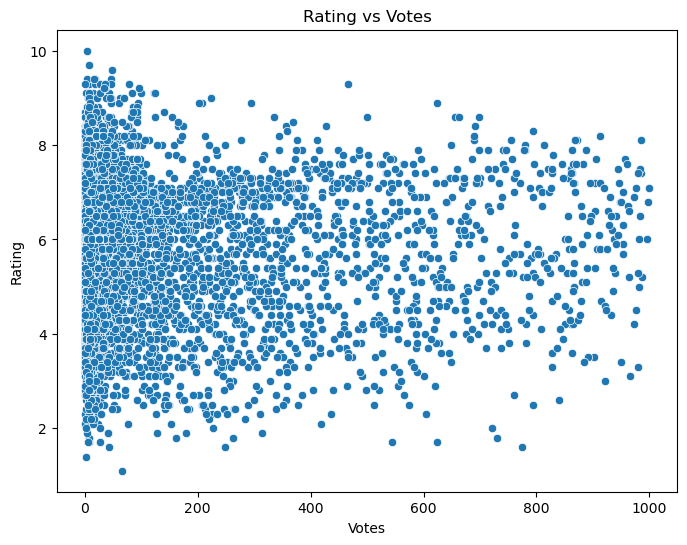

In [42]:
# Visualize scatter plots for 'Rating' vs 'Votes'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Rating vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

In [43]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,6.0,25.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,25.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.0,25.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# 🔤 Feature Encoding

In [44]:
from sklearn.preprocessing import OrdinalEncoder

# Select categorical columns for ordinal encoding
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Encode categorical columns
encoded_cols = ordinal_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=categorical_cols)

# Replace original categorical columns with encoded columns
df_encoded = df.drop(categorical_cols, axis=1)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Display the encoded DataFrame
print(df_encoded.head())


                                 Name    Year  Duration  Rating  Votes  Genre  \
0                                      1991.0     131.0     6.0   25.0  299.0   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0     7.0    8.0  299.0   
2                         #Homecoming  2021.0      90.0     6.0   25.0  351.0   
3                             #Yaaram  2019.0     110.0     4.4   35.0  228.0   
4                   ...And Once Again  2010.0     105.0     6.0   25.0  299.0   

   Director  Actor 1  Actor 2  Actor 3  
0    1926.0   2250.0    800.0   3108.0  
1    1548.0   3280.0   4790.0    527.0  
2    5123.0   3713.0   2866.0   3450.0  
3    3319.0   2917.0   1504.0   4020.0  
4     385.0   3112.0   3462.0    405.0  


In [45]:

df = df_encoded.head(10)


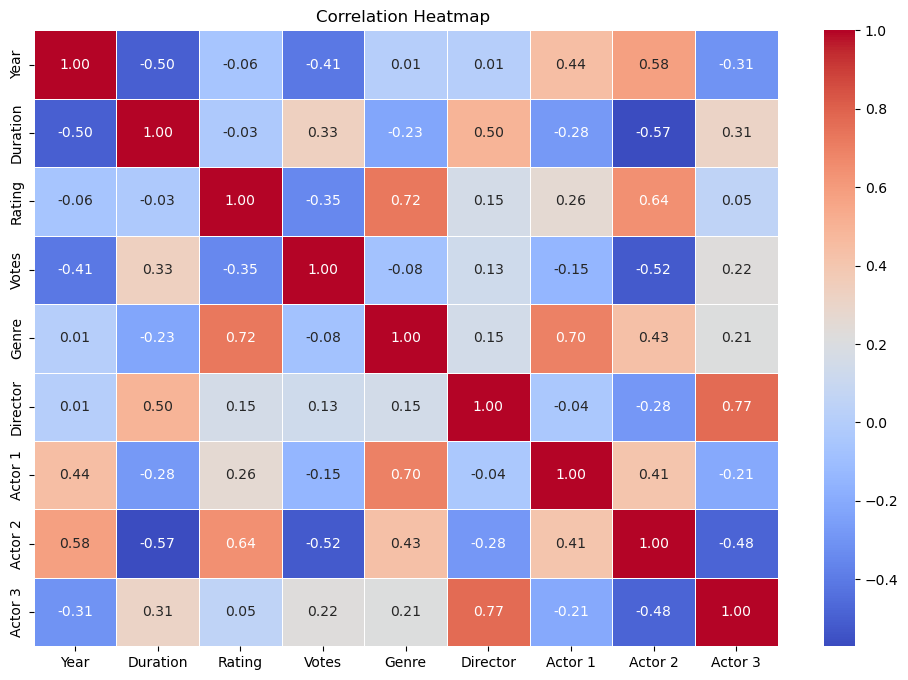

In [46]:
# Drop the 'Name' column
df_no_name = df.drop(columns=['Name'])

# Compute the correlation matrix
corr_matrix = df_no_name.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap ')
plt.show()

# 🚀 Model Training


In [47]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Rating', 'Name'])
y = df_encoded['Rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (12407, 8)
Shape of X_test: (3102, 8)
Shape of y_train: (12407,)
Shape of y_test: (3102,)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predict ratings on the testing data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.945239604618466
Mean Absolute Error (MAE): 0.6081350201938452
Root Mean Squared Error (RMSE): 0.9722343362679936
R-squared (R2) Score: 0.027941042908119162


In [57]:
prediction_reset_index.reset_index(drop=True, inplace=True)

# Drop rows with NaN values from y_test
y_test_cleaned = y_test.dropna().reset_index(drop=True)

# Create a new DataFrame with actual and predicted values
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test_cleaned,
    'Predicted': prediction_reset_index.iloc[y_test_cleaned.index]
})

# Display the first 5 rows of the DataFrame
print(actual_vs_predicted.head(5))


   Actual  Predicted
0     6.0   5.976700
1     6.8   5.922620
2     6.0   6.177880
3     6.0   6.125332
4     6.0   6.000764


In conclusion, this project has successfully explored and identified the three key factors influencing the performance of Director, General, and Actor within the context of project.